<a href="https://colab.research.google.com/github/tvelichkovt/TensorFlow/blob/master/TF_003_KerasSklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf -> "import"

In [40]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print('TensorFlow ver is:', tf.__version__, '\nKeras ver is:', keras.__version__, '\nPandas ver is:', pd.__version__, '\nNumpy ver is:', np.__version__)

TensorFlow ver is: 2.2.0 
Keras ver is: 2.3.0-tf 
Pandas ver is: 1.0.5 
Numpy ver is: 1.18.5


In [41]:
import warnings

from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

# tf -> "dataset"

In [42]:
seed = 7
np.random.seed(seed)

In [43]:
# The first way is by using the already existing functions:
X,y = make_circles(n_samples = 3000, noise = 0.08, factor=0.3)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(3000, 2)
(3000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [44]:
# The other way is by hand:
X0 = [X[i,:] for i in range(len(y)) if y[i] == 0] # returns the row where the corresponding label is 0
X1 = [X[i,:] for i in range(len(y)) if y[i] == 1] # returns the row where the corresponding label is 1
            
X0_np = np.array(X0) # convert it into an array
X1_np = np.array(X1) 

X0_train = X0_np[:1000,:].T # picked the first 1000 samples in the second axis
X0_test = X0_np[1000:,:].T # picked the remaining 500 samples in the second axis

X1_train = X1_np[:1000,:].T  # picked the first 1000 samples in the second axis
X1_test = X1_np[1000:,:].T # picked the remaining 500 samples in the second axis

X_train = np.hstack([X0_train,X1_train]).T # all training examples
y_train=np.zeros((1,2000))
y_train[0, 1000:] = 1

X_test = np.hstack([X0_test,X1_test]).T # all test examples
y_test=np.zeros((1,1000))
y_test[0, 500:] = 1

# tf -> "visualization"

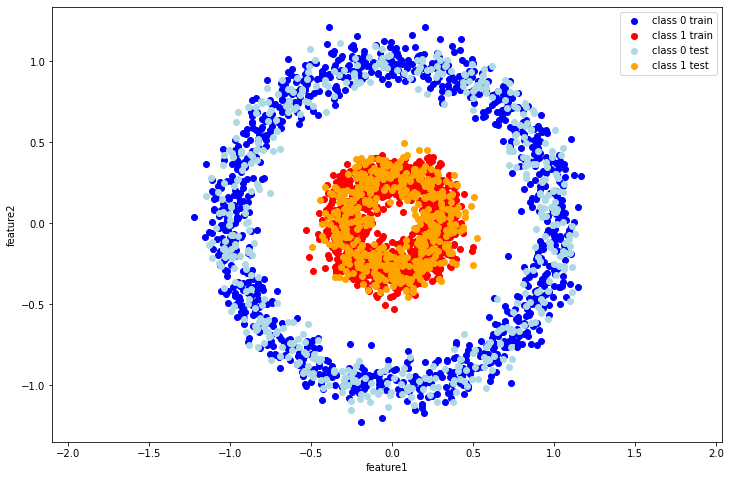

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(X0_train[0,:],X0_train[1,:], color = 'b', label = 'class 0 train')
plt.scatter(X1_train[0,:],X1_train[1,:], color = 'r',  label = 'class 1 train')
plt.scatter(X0_test[0,:],X0_test[1,:], color = 'LightBlue', label = 'class 0 test')
plt.scatter(X1_test[0,:],X1_test[1,:], color = 'Orange', label = 'class 1 test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

# tf -> "shape of the input data"

In [46]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(2000, 2)
y_train:	(1, 2000)
x_test:		(1000, 2)
y_test:		(1, 1000)


# tf -> "Neural Network	-> hyperparameters"

In [47]:
# Hyperparameters
training_epochs = 100 # Total number of training epochs
learning_rate = 0.001 # The learning rate

# tf -> "Neural Network	-> creating a model"

In [48]:
# create a model
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(8, input_dim=2, kernel_initializer='uniform', activation='relu'))
    # Output layer
    model.add(tf.keras.layers.Dense(y_train.T.shape[1], activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate), 
                metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


# tf -> "Neural Network	-> train the model"

In [49]:
results = model.fit(
    X_train, y_train.T,
    epochs= training_epochs,
    validation_data = (X_test, y_test.T),
    verbose = 0
)

# tf -> "Neural Network	-> test the model"

In [50]:
#The model can generate output predictions for the input samples.

prediction_values = model.predict_classes(X_test)

# tf -> "Neural Network	-> accuracy"

In [51]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 96.61%


# tf -> "Neural Network	-> evaluate the model to see the accuracy"

In [52]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0175, accuracy: 100.0000%
Evaluating on testing set...
loss=0.0176, accuracy: 100.0000%


# tf -> "Neural Network	-> summarize history for accuracy"

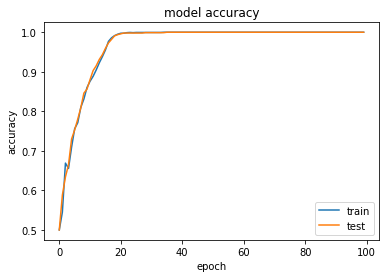

In [53]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

# tf -> "Neural Network	-> summarize history for loss"

Maximum Loss : 0.6859

Minimum Loss : 0.0177

Loss difference : 0.6682


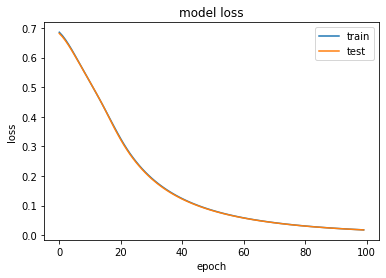

In [54]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# tf -> "Visualization	-> the training set"

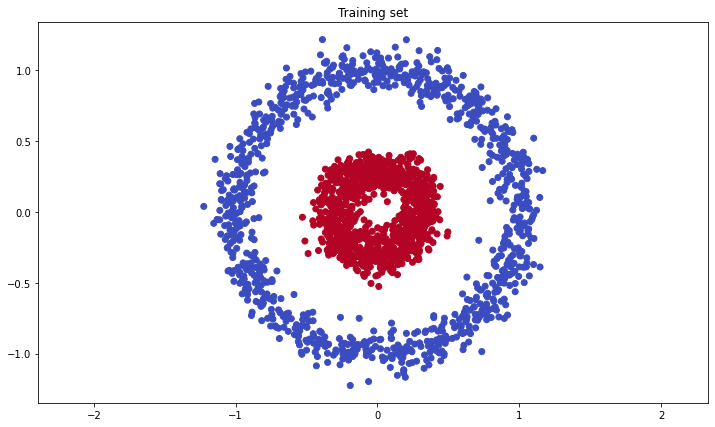

In [55]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[0,:] ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

# tf -> "Visualization	-> the model predictions on our test set"

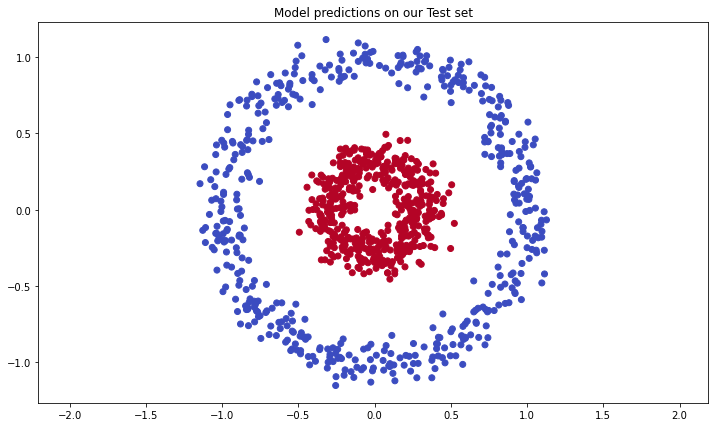

In [56]:
plt.figure(figsize =(12,7))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

# tf -> "Visualization	-> how our model separates the classes"

Text(0.5, 1.0, 'Model predictions on our Test set')

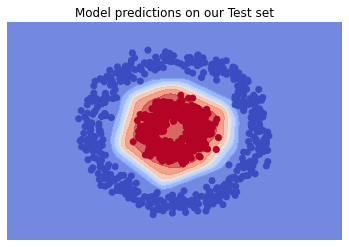

In [57]:
xx = np.linspace(-2, 2, 40)
yy = np.linspace(-1.5, 1.5, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 2])
axes.set_ylim([-1.5, 1.5])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')

# tf -> "Visualization	-> weights and biases of our model"

In [58]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)


# Output layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nOutput layer weights",weights1.shape,":\n",weights1)
print("Output layer biases",biases1.shape,":\n",biases1)

Input layer weights (2, 8) :
 [[ 2.6338599e+00 -2.0327370e+00 -9.9371150e-03  5.7973540e-01
  -2.2642725e+00  1.4056326e+00  1.3206076e-03 -8.1178880e-01]
 [-1.8185953e+00 -6.0965651e-01  8.0450758e-04  2.4522130e+00
   1.7822049e+00  1.4810017e+00  5.9747309e-03 -2.7899776e+00]]
Input layer biases (8,) :
 [-0.98664844 -0.71137255 -0.02767541 -0.83809304 -1.0028081  -0.6978522
 -0.02639617 -0.9847571 ]

Output layer weights (8, 1) :
 [[-3.9168966 ]
 [-3.9364388 ]
 [ 0.74633616]
 [-3.2473357 ]
 [-3.6926665 ]
 [-4.0859256 ]
 [ 0.06876668]
 [-3.5127697 ]]
Output layer biases (1,) :
 [3.8236918]


# tf -> "Visualization	-> activation functions"

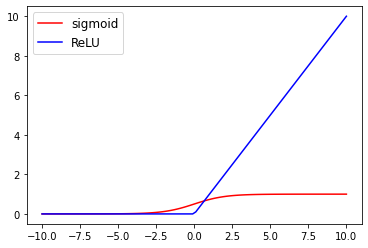

In [59]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def ReLU(z):
    return np.maximum(0,z)
  
z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z),'r', label = 'sigmoid')
plt.plot(z, ReLU(z),'b',label ='ReLU')
plt.legend(fontsize=12)

# tf -> "Visualization	-> compute the output of each neuron in our network"

In [60]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))
out15 = np.zeros((50*50, 1))
out16 = np.zeros((50*50, 1))
out17 = np.zeros((50*50, 1))
out18 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))


for i in range(len(x1)):
    for j in range(len(x2 )):
        # Input layer
        n11 = x1[i] * weights0[0][0] + x2[j] * weights0[1][0] + biases0[0]
        a11 = ReLU(n11)

        n12 = x1[i] * weights0[0][1] + x2[j] * weights0[1][1] + biases0[1]
        a12 = ReLU(n12)

        n13 = x1[i] * weights0[0][2] + x2[j] * weights0[1][2] + biases0[2]
        a13 = ReLU(n13)

        n14 = x1[i] * weights0[0][3] + x2[j] * weights0[1][3] + biases0[3]
        a14 = ReLU(n14)

        n15 = x1[i] * weights0[0][4] + x2[j] * weights0[1][4] + biases0[4]
        a15 = ReLU(n15)

        n16 = x1[i] * weights0[0][5] + x2[j] * weights0[1][5] + biases0[5]
        a16 = ReLU(n16)

        n17 = x1[i] * weights0[0][6] + x2[j] * weights0[1][6] + biases0[6]
        a17 = ReLU(n17)

        n18 = x1[i] * weights0[0][7] + x2[j] * weights0[1][7] + biases0[7]
        a18 = ReLU(n18)

        # Output layer
        n21 = a11 *weights1[0][0] + a12 *weights1[1][0] + a13 * weights1[2][0]+\
              a14 *weights1[3][0] + a15 *weights1[4][0] + a16 * weights1[5][0]+\
              a17 *weights1[6][0] + a18 *weights1[7][0] + biases1[0]

        a21 = sigmoid(n21)


        result[i*50+j,0 ] = x1[i]
        result[i*50+j, 1] = x2[j]

        out11[i*50+j] = a11
        out12[i*50+j] = a12
        out13[i*50+j] = a13
        out14[i*50+j] = a14
        out15[i*50+j] = a15
        out16[i*50+j] = a16
        out17[i*50+j] = a17
        out18[i*50+j] = a18

        out21[i*50+j] = a21

# tf -> "Visualization	-> compute the output of each neuron in our network"

In [61]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))
out15 = np.zeros((50*50, 1))
out16 = np.zeros((50*50, 1))
out17 = np.zeros((50*50, 1))
out18 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))

for i in range(len(x1)):
    for j in range(len(x2 )):
        # Input layer
        n1 = np.dot(weights0[0],x1[i]) + np.dot(weights0[1],x1[j]) + biases0
        a1 = ReLU(n1)
        # Output layer
        n2 = np.dot(weights1[:,0],a1) + biases1
        a2 = sigmoid(n2)

        result[i*50+j,0 ] = x1[i]
        result[i*50+j, 1] = x2[j]

        out11[i*50+j] = a1[0]
        out12[i*50+j] = a1[1]
        out13[i*50+j] = a1[2]
        out14[i*50+j] = a1[3]
        out15[i*50+j] = a1[4]
        out16[i*50+j] = a1[5]
        out17[i*50+j] = a1[6]
        out18[i*50+j] = a1[7]

        out21[i*50+j] = a2

# tf -> "Visualization	-> plot the output of each neuron in the input layer"

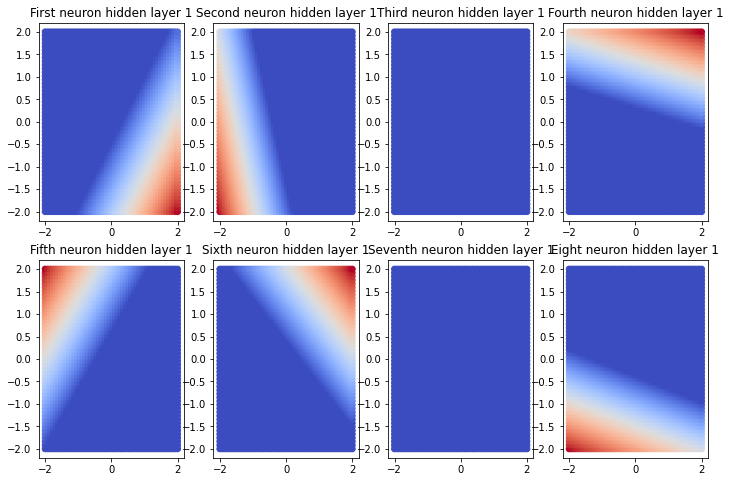

In [62]:
plt.figure(figsize =(12,8))

# First neuron, input layer
plt.subplot(241)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out11.reshape(-1), cmap=cm.coolwarm)

# Second neuron, input layer
plt.subplot(242)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out12.reshape(-1), cmap=cm.coolwarm)

# Third neuron, input layer
plt.subplot(243)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out13.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, input layer
plt.subplot(244)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out14.reshape(-1), cmap=cm.coolwarm)

# Fifth neuron, input layer
plt.subplot(245)
plt.title('Fifth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out15.reshape(-1), cmap=cm.coolwarm)

# Sixth neuron, input layer
plt.subplot(246)
plt.title('Sixth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out16.reshape(-1), cmap=cm.coolwarm)

# Seventh neuron, input layer
plt.subplot(247)
plt.title('Seventh neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out17.reshape(-1), cmap=cm.coolwarm)

# Eight neuron, input layer
plt.subplot(248)
plt.title('Eight neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out18.reshape(-1), cmap=cm.coolwarm)

# tf -> "Visualization	-> output layer"

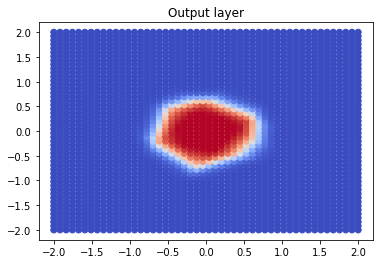

In [63]:
# output layer
plt.title('Output layer')
plt.scatter(result[:, 0], result[:, 1], c= out21.reshape(-1), cmap=cm.coolwarm)

# tf -> "3D visualization -> neural network input layer"

Text(0.5, 0.92, '3D visualization of our neural network first layer eight neuron')

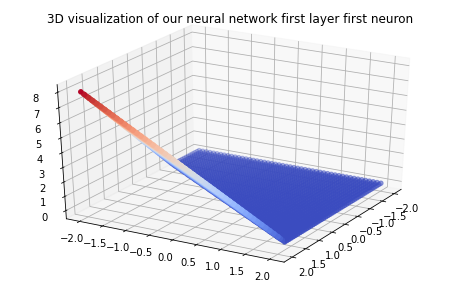

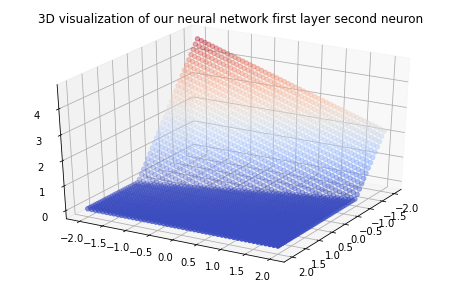

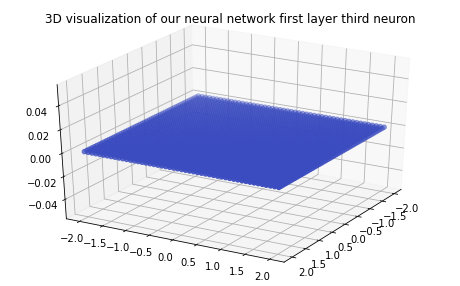

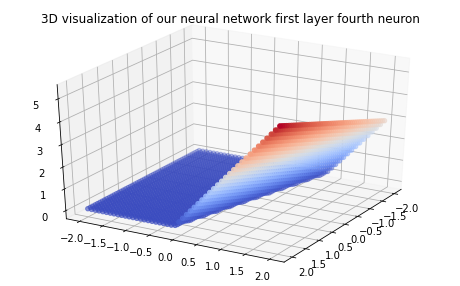

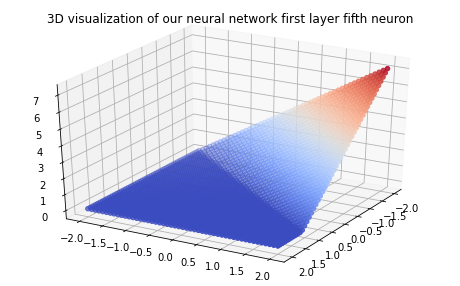

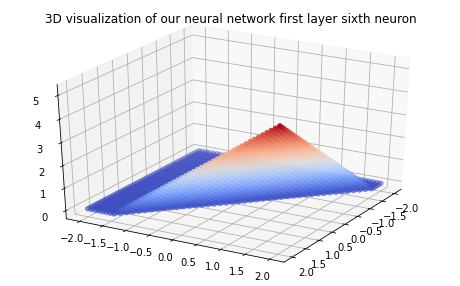

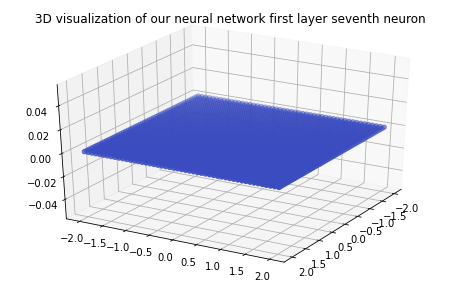

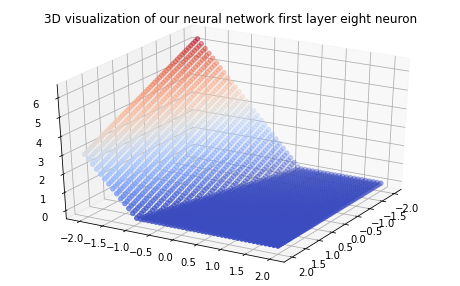

In [64]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out11.reshape(-1), c=out11.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out12.reshape(-1), c=out12.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out13.reshape(-1), c=out13.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fourth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out15.reshape(-1), c=out15.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fifth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out16.reshape(-1), c=out16.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer sixth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out17.reshape(-1), c=out17.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer seventh neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out18.reshape(-1), c=out18.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer eight neuron')

# tf -> "3D visualization -> neural network output layer"

Text(0.5, 0.92, '3D visualization of our neural network output layer')

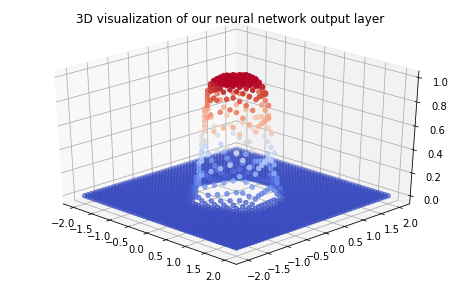

In [65]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out21.reshape(-1), c=out21.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30,-45)
ax.set_title('3D visualization of our neural network output layer')